In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Importing cleaned datasets
training_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/test_data.csv")
validation_data = pd.read_csv("data/validate_data.csv")

In [5]:
# Splitting the features and the target for datasets
features = ["Plant_Production_GWh", "Population_k", "tmax"]
target = ["Max_Demand_GW"]

x_train = training_data[features]
y_train = training_data[target]

x_test = test_data[features]
y_test = test_data[target]

x_validate = validation_data[features]
y_validate = validation_data[target]

In [6]:
# Adding polynomial features
# Degree is equal to 2 because 2 is the polynomial degree
degree = 2

poly = PolynomialFeatures(degree=degree)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
x_validate_poly = poly.transform(x_validate)

In [13]:
# Create and train the polynomial regression model
poly_regression_model = LinearRegression()
poly_regression_model.fit(x_train_poly, y_train)

LinearRegression()

In [8]:
# Make predictions on the test dataset
y_test_prediction = poly_regression_model.predict(x_test_poly)
# Evaluate the model on the test dataset
mse_test = mean_squared_error(y_test, y_test_prediction)
print(f"Mean Squared Error on Test Set: {mse_test}")
mae_test= mean_absolute_error(y_test, y_test_prediction)
print(f"Mean Absolute Error on Test Set: {mae_test}")

print("\n")

# Make predictions on the validation dataset
y_validate_prediction = poly_regression_model.predict(x_validate_poly)
# Evaluate the model on the validation dataset
mse_validation = mean_squared_error(y_validate, y_validate_prediction)
print(f"Mean Squared Error on Validation Set: {mse_validation}")
mae_validation = mean_absolute_error(y_validate, y_validate_prediction)
print(f"Mean Absolute Error on Validation Set: {mae_validation}")

Mean Squared Error on Test Set: 0.0003998564839601934
Mean Absolute Error on Test Set: 0.015127243126943872


Mean Squared Error on Validation Set: 0.0014412072067326697
Mean Absolute Error on Validation Set: 0.030588449838946676


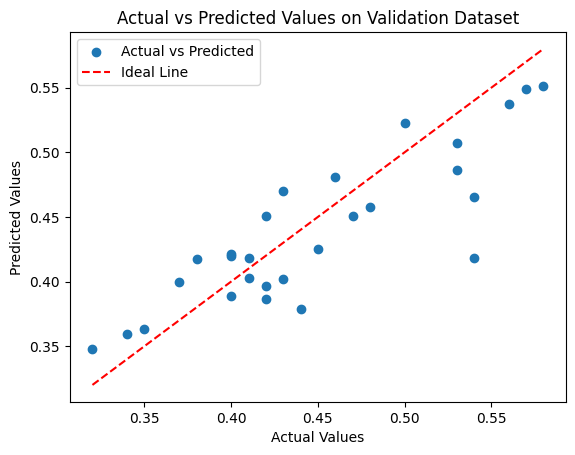

In [9]:
# Generate data for the ideal line (y = x)
x_ideal = np.linspace(y_validate.min(), y_validate.max(), 100)
y_ideal = x_ideal

# Plotting the actual vs predicted values on the test set
plt.scatter(y_validate, y_validate_prediction, label="Actual vs Predicted")
plt.plot(x_ideal, y_ideal, color="red", label="Ideal Line", linestyle='--')
plt.title("Actual vs Predicted Values on Validation Dataset")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [10]:
# Calculating the MAPE on the Validation dataset
def mean_absolute_percentage_error(actual, predictions): 
    actual, predictions = np.array(actual), np.array(predictions)
    return np.mean(np.abs((actual - predictions) / actual)) * 100

mape = mean_absolute_percentage_error(y_validate, y_validate_prediction)
print(f'\nMAPE on validation dataset: {mape:.2f}%')


MAPE on validation dataset: 6.72%


In [11]:
# T-Test - Generated
x_train_poly_intercept = sm.add_constant(x_train_poly)
sm_model = sm.OLS(y_train, x_train_poly_intercept).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Max_Demand_GW   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     48.89
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           3.15e-35
Time:                        18:52:25   Log-Likelihood:                 318.29
No. Observations:                 125   AIC:                            -616.6
Df Residuals:                     115   BIC:                            -588.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2252      0.883      0.255      0.7